## CONCEITO: REDES NEURAIS RECORRENTES (RNN)

### 📘 1. Introdução
--------------------------------------------------------------
RNNs (Redes Neurais Recorrentes) são redes projetadas para lidar
com dados sequenciais, como texto, séries temporais ou sinais.
A principal característica é a "memória interna":
a saída depende não apenas do input atual, mas também dos anteriores.

Exemplo de aplicações:
- Previsão de séries temporais (clima, preços)
- Modelagem de linguagem (texto, fala)
- Análise de sentimentos em texto

==============================================================

### 📘 2. Diferença entre ANN e RNN
--------------------------------------------------------------
ANN: entrada → camada oculta → saída (sem memória)
RNN: entrada(t) + estado(t-1) → camada oculta → saída(t) + estado(t)

Cada passo depende do anterior, permitindo aprender dependências
temporais.

==============================================================

### 📘 3. Exemplo prático: Previsão de sequência numérica
--------------------------------------------------------------
Objetivo: dado um número, prever o próximo na sequência: [0,1,2,3...]


In [5]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras import Input
import matplotlib.pyplot as plt

# Gerar sequência simples (0 a 99)
dados = np.arange(100)

# Criar pares de entrada/saída (ex: 0→1, 1→2, ...)
def criar_sequencia(dados, passo):
    X, y = [], []
    for i in range(len(dados) - passo):
        X.append(dados[i:i+passo])
        y.append(dados[i+passo])
    return np.array(X), np.array(y)

passo = 5
X, y = criar_sequencia(dados, passo)

# Ajustar formato para RNN: [amostras, passos, características]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Normalizar (0-1)
X = X / np.max(dados)
y = y / np.max(dados)

# Dividir em treino/teste
split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

### 📘 4. Construindo a RNN

In [6]:
model = Sequential()
model.add(Input(shape=(passo, 1)))
model.add(SimpleRNN(10, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

# Treinar
history = model.fit(X_train, y_train, epochs=200, verbose=0)

# Avaliar
loss = model.evaluate(X_test, y_test)
print(f"Loss no teste: {loss:.6f}")

# Prever
y_pred = model.predict(X_test)

# Desnormalizar para comparar
y_test_rescaled = y_test * np.max(dados)
y_pred_rescaled = y_pred * np.max(dados)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - loss: 0.0164
Loss no teste: 0.016382
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


### 📘 5. Visualização

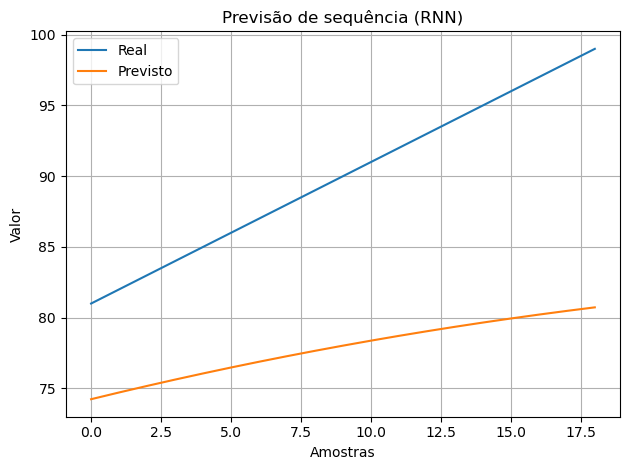

In [7]:
plt.plot(y_test_rescaled, label='Real')
plt.plot(y_pred_rescaled, label='Previsto')
plt.title("Previsão de sequência (RNN)")
plt.xlabel("Amostras")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 📘 6. Conclusão
--------------------------------------------------------------
Este exemplo mostra como RNNs aprendem padrões temporais simples.
Em aplicações reais, usamos embeddings, camadas LSTM/GRU e dados complexos.
Mas o conceito central — memória sequencial — é a base para todos os modelos recorrentes.